**Loan Prediction Problem**


In [2]:
#Importing libraries
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading datasets
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")

In [4]:
#Making copy
df=train.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Understanding data

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#For column values that can be categorized

In [9]:
cols=df.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
#counting the unique values[using value_counts()]
df[cols[1]].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
#finding percentage of values
df[cols[1]].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

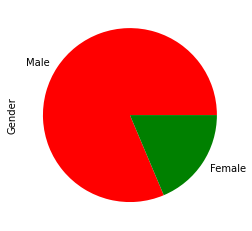

In [12]:
#visualisation 
#column-Gender
df[cols[1]].value_counts(normalize=True).plot(kind='pie',colors=['r','g'])

Text(0, 0.5, 'percentage')

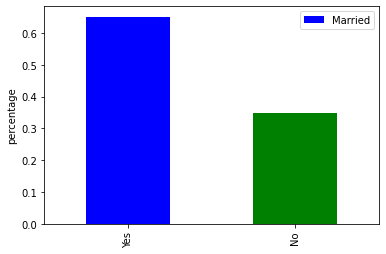

In [13]:
#Married
df[cols[2]].value_counts(normalize=True).plot(kind='bar',color=['b','g'],legend=True)
plt.ylabel("percentage")


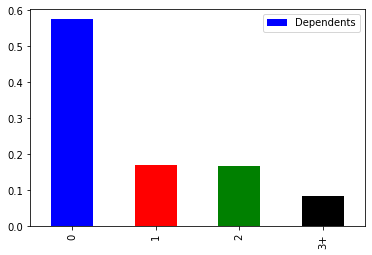

In [14]:
#Dependents
df[cols[3]].value_counts(normalize=True).plot(kind='bar',color=['b','r','g','k'],legend=True)

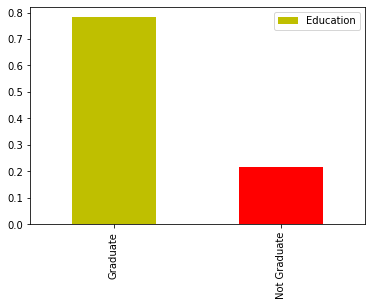

In [15]:
#Education
df[cols[4]].value_counts(normalize=True).plot(kind='bar',color=['y','r'],legend=True)

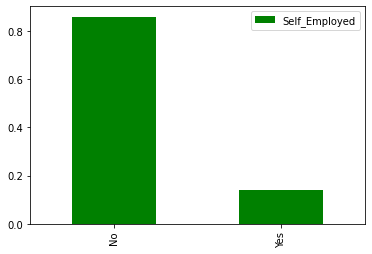

In [16]:
#Self Employed
df[cols[5]].value_counts(normalize=True).plot(kind='bar',color='g',legend=True)

In [17]:
#unique values in column 'loan amount term'
df[cols[9]].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

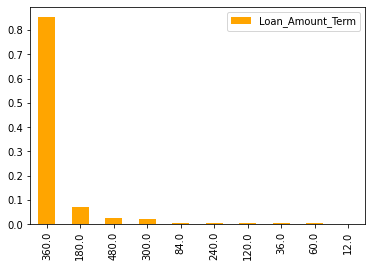

In [18]:
#loan amount term
df[cols[9]].value_counts(normalize=True).plot(kind='bar',color='orange',legend=True)

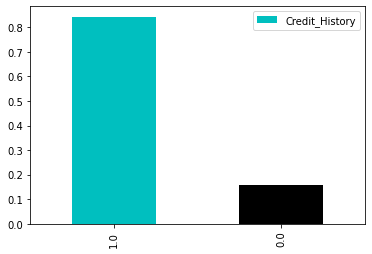

In [19]:
#Credit history
df[cols[10]].value_counts(normalize=True).plot(kind='bar',color=['c','k'],legend=True)

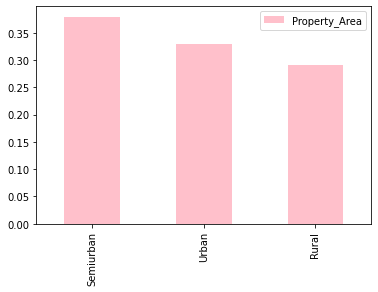

In [20]:
#property area
df[cols[11]].value_counts(normalize=True).plot(kind='bar',color='pink',legend=True)

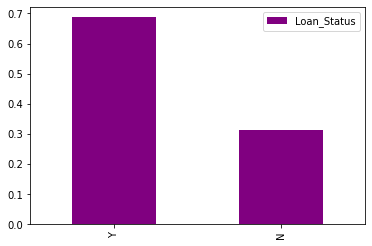

In [21]:
#loan status
df[cols[-1]].value_counts(normalize=True).plot(kind='bar',color='purple',legend=True)

In [22]:
#Making distribution and box plot for columns containtng numerical values

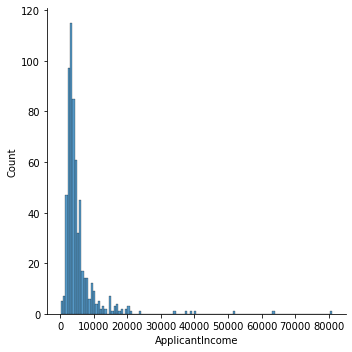

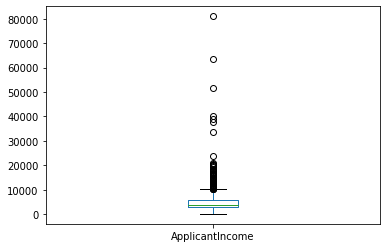

In [23]:
#finding distribution
#ApplicantIncome
sns.displot(df[cols[6]])
plt.show()
df[cols[6]].plot.box()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

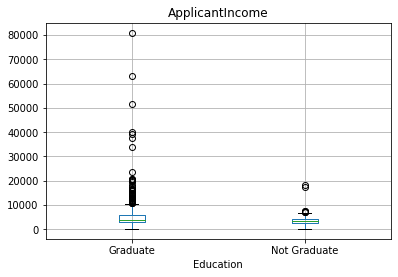

In [24]:
#identifying outliers in applicant income between Graduates and Not Graduates
df.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
#it shows Graduates earn more than non graduates

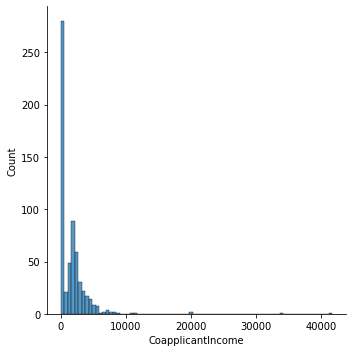

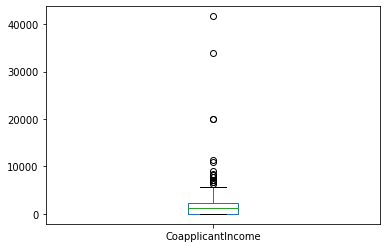

In [25]:
#CoapplicantIncome
sns.displot(df[cols[7]])
plt.show()
df[cols[7]].plot.box()

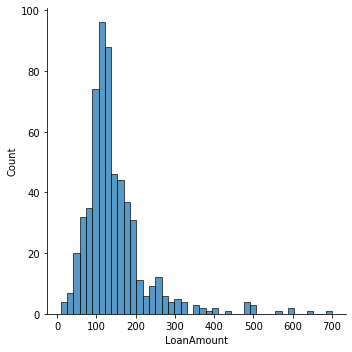

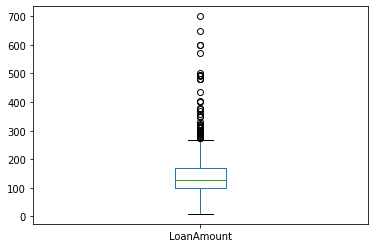

In [26]:
#loanamount
sns.displot(df[cols[8]])
plt.show()
df[cols[8]].plot.box()

In [27]:
#bivariate analysis
#comparing loan status with other featues

In [28]:
#Gender & loan status
gn=pd.crosstab(df[cols[1]],df[cols[-1]])
gn

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [29]:
##total no of male and female and changing datatype
gn.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [30]:
#to get percentage
gn.div(gn.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


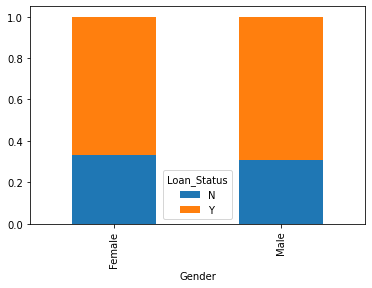

In [31]:
gn.div(gn.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [32]:
gn.sum(0).astype(float)

Loan_Status
N    187.0
Y    414.0
dtype: float64

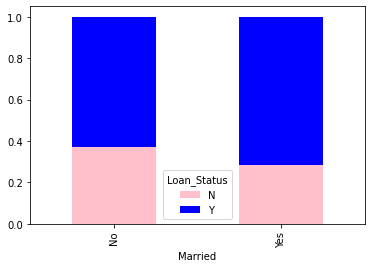

In [33]:
#Married & loan status
mr=pd.crosstab(df[cols[2]],df[cols[-1]])
mr.div(mr.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['pink','blue'])

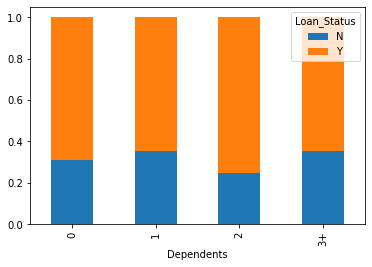

In [34]:
#Dependents&Loan_Status
dp=pd.crosstab(df[cols[3]],df[cols[-1]])
dp.div(dp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


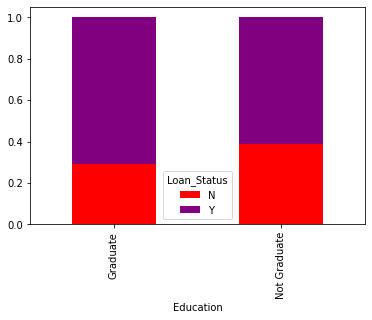

In [35]:
#Education&Loan_Status
ed=pd.crosstab(df[cols[4]],df[cols[-1]])
ed.div(ed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['red','purple'])

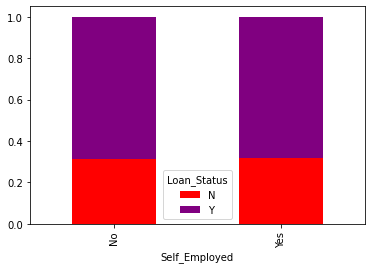

In [36]:
#Self_Employed&Loan_Status
sle=pd.crosstab(df[cols[5]],df[cols[-1]])
sle.div(sle.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['red','purple'])

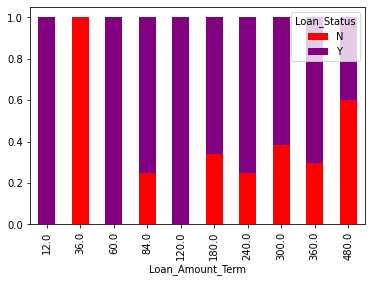

In [37]:
#Loan_Amount_Term&Loan_Status
la=pd.crosstab(df[cols[9]],df[cols[-1]])
la.div(la.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['red','purple'])

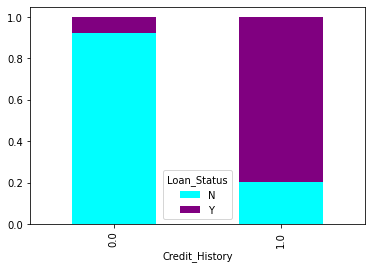

In [38]:
#Credit_History&Loan_Status
credits=pd.crosstab(df[cols[10]],df[cols[-1]])
credits.div(credits.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['cyan','purple'])

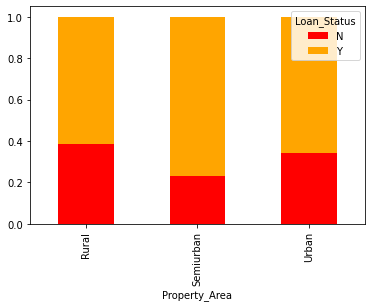

In [39]:
#Property_Area&Loan_Status
pa=pd.crosstab(df[cols[11]],df[cols[-1]])
pa.div(pa.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['red','orange'])

In [40]:
#mean income of yes and no in loan status
df.groupby(cols[-1])[cols[6]].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

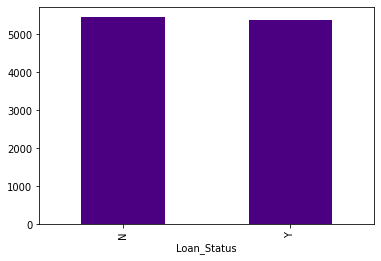

In [41]:
df.groupby(cols[-1])[cols[6]].mean().plot(kind='bar',color='indigo')

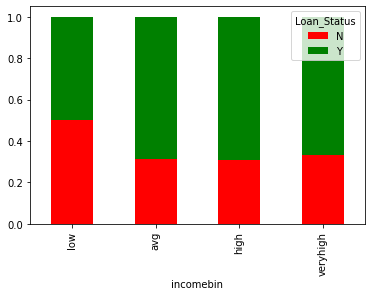

In [42]:
bins=[0,1000,5000,50000,81000]
labels=['low','avg','high','veryhigh']
df['incomebin']=pd.cut(df[cols[6]],bins,labels=labels)
inc=pd.crosstab(df['incomebin'],df[cols[-1]])
inc.div(inc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['red','green'])         

In [43]:
#coapplicant & Loan_Status
df.groupby(cols[-1])[cols[7]].mean()

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

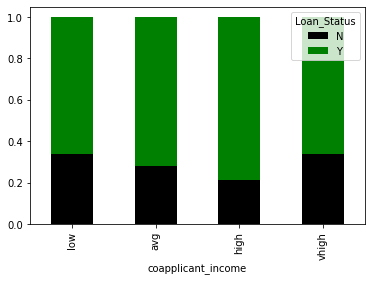

In [44]:
bins=[-1,800,2000,2500,50000]
labels=['low','avg','high','vhigh']
df['coapplicant_income']=pd.cut(df[cols[7]],bins,labels=labels)
coapplicant_income=pd.crosstab(df['coapplicant_income'],df[cols[-1]])
coapplicant_income.div(coapplicant_income.sum(1),axis=0).plot(kind='bar',stacked=True,color=['k','green'])

In [45]:
#LoanAmount&Loan_Status
df.groupby(cols[-1])[cols[8]].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

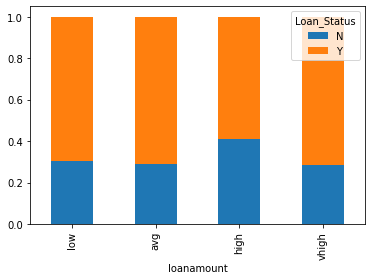

In [46]:
bins=[0,100,200,400,750]
labels=['low','avg','high','vhigh']
df['loanamount']=pd.cut(df[cols[8]],bins,labels=labels)
loanamount=pd.crosstab(df['loanamount'],df[cols[-1]])
loanamount.div(loanamount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [47]:
df['total_income']=df[cols[7]]+df[cols[6]]
df.groupby(cols[-1])['total_income'].mean()

Loan_Status
N    7323.885417
Y    6888.585118
Name: total_income, dtype: float64

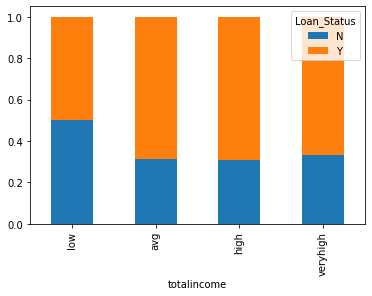

In [48]:
bins=[0,1000,5000,50000,81000]
labels=['low','avg','high','veryhigh']
df['totalincome']=pd.cut(df[cols[6]],bins,labels=labels)
totalincome=pd.crosstab(df['totalincome'],df[cols[-1]])
totalincome.div(totalincome.sum(1),axis=0).plot(kind='bar',stacked=True)

#Data Preparation

In [49]:
sdf=df.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,incomebin,coapplicant_income,loanamount,total_income,totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,high,low,NaN,5849.0,high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,avg,avg,avg,6091.0,avg
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,avg,low,low,3000.0,avg
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,avg,high,avg,4941.0,avg
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,high,low,avg,6000.0,high


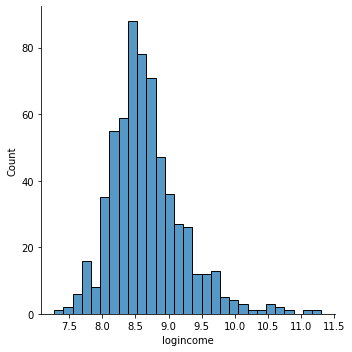

In [50]:
#taking log of total income to remove outliers
df['logincome']=np.log(df['total_income'])
sns.displot(df['logincome'])

In [51]:
#filling Nan values
df['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
df['Married'].fillna(train['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
df['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)


In [52]:
#droping unwanted features
df=df.drop(['total_income','loanamount','incomebin','coapplicant_income','total_income','CoapplicantIncome','ApplicantIncome'],axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome,logincome
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,high,8.674026
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,avg,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,avg,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,avg,8.505323
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,high,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,Y,avg,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,Y,avg,8.320205
611,LP002983,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,Y,high,9.025456
612,LP002984,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,Y,high,8.933664


In [53]:
df.isna().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
totalincome         0
logincome           0
dtype: int64

In [54]:
df['emi']=df['LoanAmount']/df['Loan_Amount_Term']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome,logincome,emi
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,high,8.674026,0.406700
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,avg,8.714568,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,avg,8.006368,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,avg,8.505323,0.333333
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,high,8.699515,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,Y,avg,7.972466,0.197222
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,Y,avg,8.320205,0.222222
611,LP002983,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,Y,high,9.025456,0.702778
612,LP002984,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,Y,high,8.933664,0.519444


In [55]:
df=df.drop(['Loan_ID','Loan_Amount_Term'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,totalincome,logincome,emi
0,Male,No,0,Graduate,No,146.412162,1.0,Urban,Y,high,8.674026,0.406700
1,Male,Yes,1,Graduate,No,128.000000,1.0,Rural,N,avg,8.714568,0.355556
2,Male,Yes,0,Graduate,Yes,66.000000,1.0,Urban,Y,avg,8.006368,0.183333
3,Male,Yes,0,Not Graduate,No,120.000000,1.0,Urban,Y,avg,8.505323,0.333333
4,Male,No,0,Graduate,No,141.000000,1.0,Urban,Y,high,8.699515,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,1.0,Rural,Y,avg,7.972466,0.197222
610,Male,Yes,3+,Graduate,No,40.000000,1.0,Rural,Y,avg,8.320205,0.222222
611,Male,Yes,1,Graduate,No,253.000000,1.0,Urban,Y,high,9.025456,0.702778
612,Male,Yes,2,Graduate,No,187.000000,1.0,Urban,Y,high,8.933664,0.519444


In [56]:
wdf=df.drop(['Loan_Status'],axis=1)
wdf

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,totalincome,logincome,emi
0,Male,No,0,Graduate,No,146.412162,1.0,Urban,high,8.674026,0.406700
1,Male,Yes,1,Graduate,No,128.000000,1.0,Rural,avg,8.714568,0.355556
2,Male,Yes,0,Graduate,Yes,66.000000,1.0,Urban,avg,8.006368,0.183333
3,Male,Yes,0,Not Graduate,No,120.000000,1.0,Urban,avg,8.505323,0.333333
4,Male,No,0,Graduate,No,141.000000,1.0,Urban,high,8.699515,0.391667
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,1.0,Rural,avg,7.972466,0.197222
610,Male,Yes,3+,Graduate,No,40.000000,1.0,Rural,avg,8.320205,0.222222
611,Male,Yes,1,Graduate,No,253.000000,1.0,Urban,high,9.025456,0.702778
612,Male,Yes,2,Graduate,No,187.000000,1.0,Urban,high,8.933664,0.519444


In [77]:
#Convert categorical variable into indicator variables
tdf=pd.get_dummies(wdf)
tdf.head()

,LoanAmount,Credit_History,logincome,emi,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,totalincome_low,totalincome_avg,totalincome_high,totalincome_veryhigh
0,146.412162,1.0,8.674026,0.406700,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,128.000000,1.0,8.714568,0.355556,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
2,66.000000,1.0,8.006368,0.183333,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
3,120.000000,1.0,8.505323,0.333333,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
4,141.000000,1.0,8.699515,0.391667,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [111]:
fdf=tdf.drop(['totalincome_low','totalincome_avg','totalincome_high','totalincome_veryhigh'],axis=1)
fdf

,LoanAmount,Credit_History,logincome,emi,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,1.0,8.674026,0.406700,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,128.000000,1.0,8.714568,0.355556,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,66.000000,1.0,8.006368,0.183333,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,120.000000,1.0,8.505323,0.333333,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,141.000000,1.0,8.699515,0.391667,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.000000,1.0,7.972466,0.197222,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,40.000000,1.0,8.320205,0.222222,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,253.000000,1.0,9.025456,0.702778,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,187.000000,1.0,8.933664,0.519444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [81]:
zdf=df['Loan_Status']
zdf.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#**Model Creation**

##**Logistic Regression**

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(fdf,zdf,test_size=0.3)

In [116]:
ob1=LogisticRegression()
ob1.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
pre1=ob1.predict(xtest)
pre1

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [120]:
accuracy_score(pre1,ytest)

0.7945945945945946

##**DecisiontreeClassifier**

In [113]:
from sklearn.tree import DecisionTreeClassifier
x1train,x1test,y1train,y1test=train_test_split(fdf,zdf,test_size=0.3)
ob2=DecisionTreeClassifier()
ob2.fit(x1train,y1train)
pre2=ob2.predict(x1test)
pre2

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [114]:
accuracy_score(pre2,y1test)

0.6972972972972973

##**RandomForest**

In [142]:
from sklearn.ensemble import RandomForestClassifier
x3train,x3test,y3train,y3test=train_test_split(fdf,zdf,test_size=0.3)
ob3=RandomForestClassifier()
ob3.fit(x3train,y3train)
pre3=ob3.predict(x3test)
pre3

array(['N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y

In [143]:
accuracy_score(pre3,y3test)

0.7567567567567568

#**Predicting the test values**

In [67]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [105]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)







In [106]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
Log_Total_Income     0
EMI                  0
dtype: int64

In [107]:

test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Log_Total_Income']=np.log(test['Total_Income'])
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Log_Total_Income,EMI
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724,0.305556
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581,0.350000
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678,0.577778
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129,0.277778
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378,0.216667


In [108]:
x_test=test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Total_Income'],axis=1)

In [121]:
trn=pd.get_dummies(x_test)
trn

,LoanAmount,Credit_History,Log_Total_Income,EMI,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,110.0,1.0,8.651724,0.305556,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,126.0,1.0,8.428581,0.350000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,208.0,1.0,8.824678,0.577778,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,100.0,1.0,8.494129,0.277778,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,78.0,1.0,8.094378,0.216667,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,113.0,1.0,8.663196,0.313889,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,115.0,1.0,8.490233,0.319444,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,126.0,1.0,8.564649,0.350000,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,158.0,1.0,8.908289,0.438889,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [122]:
pref=ob1.predict(trn)
pref

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [124]:
accuracy_score(pre1,ytest)

0.7945945945945946

In [125]:
ypre=ob1.predict(trn)
ypre

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [127]:
success=pd.DataFrame({'Loan_ID':test['Loan_ID'],
                      'Loan_Status':ypre})
success

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [128]:
success['Loan_Status'].value_counts()

Y    306
N     61
Name: Loan_Status, dtype: int64

In [144]:
success.to_csv('submitted.csv')

In [ ]:
test

#covarience matrix

In [145]:
train['Gender'].replace('Male',0,inplace=True)
train['Gender'].replace('Female',1,inplace=True)
train['Married'].replace('Yes',1,inplace=True)
train['Married'].replace('No',0,inplace=True)
train['Education'].replace('Graduate',1,inplace=True)
train['Education'].replace('Not Graduate',0,inplace=True)
train['Self_Employed'].replace('Yes',1,inplace=True)
train['Self_Employed'].replace('No',0,inplace=True)
train['Property_Area'].replace('Urban',0,inplace=True)
train['Property_Area'].replace('Rural',1,inplace=True)
train['Property_Area'].replace('SemiUrban',2,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Dependents'].replace('0',0,inplace=True)
train['Dependents'].replace('1',1,inplace=True)
train['Dependents'].replace('2',2,inplace=True)
train['Dependents'].replace('3',3,inplace=True)

In [146]:
mat=train.corr()
mat

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.000000,-0.369612,0.049258,0.009829,-0.053989,-0.083946,-0.106947,0.075117,-0.016337,-0.019857
Married,-0.369612,1.000000,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.089280
Education,0.049258,-0.014223,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.085884
Self_Employed,0.009829,0.001909,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.002303
ApplicantIncome,-0.053989,0.051332,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.083946,0.077770,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,-0.106947,0.149519,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,0.075117,-0.103810,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.016337,0.004381,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.019857,0.089280,0.085884,-0.002303,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


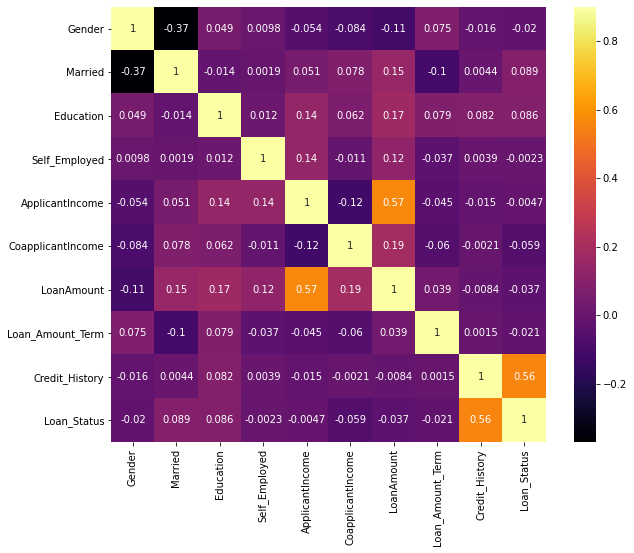

In [147]:
ax,f=plt.subplots(figsize=(10,8))
sns.heatmap(mat,vmax=0.9,cmap='inferno',square=True,annot=True)